# Figure 11.13  - Rx1day trend maps 

* Reproduced after Sun et al., [2021](https://journals.ametsoc.org/view/journals/clim/34/1/jcliD190892.xml)

Author: Mathias Hauser with Qiaohong Sun

In [1]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplotutils as mpu
import pandas as pd

import conf
from utils import plot

mpl.rcParams["font.sans-serif"] = "Arial"

## Load data

data provided by Qiaohong Sun

In [2]:
fN = "../data/sun_2021/station_MK_1950_2018.csv"

df = pd.read_csv(fN, header=0)

lon = df.x.values
lat = df.y.values

rx = df.Rx1day.values

### Convention

| Number | Meaning                  |
|----|------------------------------|
|  2 | significant increasing trend |
|  1 | non-significant increasing trend |
| -1 | non-significant decreasing trend |
| -2 | significant decreasing trend |

## Helper functions

In [3]:
def pts(cat):
    """return location for a certain category"""

    return lon[rx == cat], lat[rx == cat]


def plot_cat(ax, cat, label=None, **kwargs):
    """plot location for one category

    Parameters
    ----------
    ax : geoaxes
        Geoaxes to add the locations to.
    cat : int
        Category to plot, see convention above.
    label : str
        Label to be used in the legend.
    **kwargs : keyword arguments
        Keyword arguments to be passed to `ax.plot`.

    """
    
    # plot points
    ax.plot(*pts(cat), "o", transform=ccrs.PlateCarree(), **kwargs)

    if label is not None:
        kwargs_ = kwargs.copy()
        ms = kwargs_.pop("ms", None)
        
        # make the marker bigger, so it can be seen on the legend
        if ms is not None:
            ms = ms * 5
        
        # empty plot for the legend
        ax.plot(
            [], [], "o", transform=ccrs.PlateCarree(), label=label, ms=ms, **kwargs_
        )

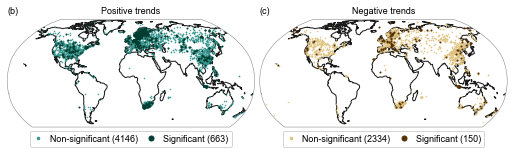

In [4]:
f, axes = plot.map_subplots(1, 2)

# ====
# plot positive trends

ax = axes[0]

n = (df.Rx1day == 1).sum().item()
plot_cat(ax, cat=1, color="#35978f", label=f"Non-significant ({n})", ms=0.5)

n = (df.Rx1day == 2).sum().item()
plot_cat(ax, cat=2, color="#003c30", label=f"Significant ({n})", ms=1)

ax.set_title("Positive trends", fontsize=9)
ax.set_title("(b)", fontsize=9, loc="left")

# ====
# plot negative trends

ax = axes[1]

n = (df.Rx1day == -1).sum().item()
plot_cat(ax, cat=-1, color="#dfc27d", label=f"Non-significant ({n})", ms=0.5)

n = (df.Rx1day == -2).sum().item()
plot_cat(ax, cat=-2, color="#543005", label=f"Significant ({n})", ms=1)

ax.set_title("Negative trends", fontsize=9)
ax.set_title("(c)", fontsize=9, loc="left")

# ====

for ax in axes:

    plot.coastlines(ax, lw=1)
    ax.set_global()
    ax.set_extent([-180, 180, -60, 86], ccrs.PlateCarree())
    ax.legend(
        fontsize=9,
        ncol=3,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.225),
        columnspacing=1,
        handlelength=1,
    )
    ax.set_xlim(ax.projection.x_limits)
    s = ax.spines["geo"]
    s.set_lw(0.5)
    s.set_color("0.5")

f.subplots_adjust(left=0.01, right=0.99, wspace=0.02, bottom=0.15)
mpu.set_map_layout(ax, width=18)

fN = conf.figure_filename("Figure_11.13_rx1day_trend_maps", "Figure_11.13_rx1day_trend_maps")
plt.savefig(fN + ".png", dpi=300, facecolor="w")
plt.savefig(fN + ".pdf", dpi=300)